<a href="https://colab.research.google.com/github/dimbambam/famou/blob/master/Land_Cover_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KLASIFIKASI TUTUPAN LAHAN BERDASARKAN SNI 7645-2010 PADA CITRA SATELIT MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK(CNN)**

# Preferensi

Penelitian Sebelumnya :
**Metode Convolutional Neural Network pada Gambar Google Earth Hutan Bambu di Jepang dengan .** 

*Shuntaro Watanabe, Kazuaki Sumi, Takeshi Ise*

link sebagai berikut : https://doi.org/10.1101/351643

**Note**

Penelitian ini mengambil konsep dari peneliti asal Jepang yang mengidentifikasikan vegatasi akurasi tinggi lahan hutan bamboo di beberapa wilayah Jepang, dengan klasisfikasi CNN, dan dilakukan dengan metode chopped-image. Selain itu, penelitian ini juga berasosiasi dengan Identifikasi Lahan Pertahian yang dilakukan oleh Fendy Prayogi dalam mengidentifikasi daerah sawah dan non-sawah menggunakan klasifikasi CNN.

Penelitian ini akan mengklasifikasikan citra satelit berdasarkan SNI 7645-2010 hingga tujuh kelas yang berbeda menggunakan CNN serta sliding window. 

Peneliti : Dhiemas Fatah Mujahid

Repositori tersedia pada : https://github.com/Gio1709/paddy


# Mengimpor/Mengambil Fungsi Library

In [ ]:
!pip install slidingwindow
import slidingwindow as sw
import numpy as np
import os
import keras.backend as K
import keras
import pandas as pd
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import resize
from sklearn.utils.class_weight import compute_class_weight

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



# Mengambil Dataset dari Google Drive

*   Item daftar
*   Item daftar



In [ ]:
# Mengambil dataset dari github

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy/trunk/data > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy_100/trunk/data > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy_300/trunk/data > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy-coba/trunk/data/ > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy_100m_new/trunk/data/ > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Soedirman-Machine-Learning/Land-Cover-Classification/trunk/0.3/mungkin_bener> /dev/null 
from google.colab import drive
drive.mount('/content/drive/')
#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy_300m/trunk/data/ > /dev/null 

#!apt-get install subversion > /dev/null
#!svn export https://github.com/Gio1709/paddy_300m_new/trunk/data/ > /dev/null 

#!wget https://raw.githubusercontent.com/Gio1709/paddy/master/paddy.zip paddy.zip
#!unzip -P paddy paddy.zip


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgbW5Sa6ALrZxDn6kQ2p3Dd9xwezgFgrSXTkNwrFuJylh0UAkWR-KQ


TIMEOUT: ignored

In [ ]:
#Perintah untuk melihat list bagian dari file yang sudah diunduh dari Github

!ls /content/drive/MyDrive/Colab_Notebooks/dataset/0.3
#gambar dengan label "k" adalah gambar dari fitur kebun teh(Kelas 1)"
#gambar dengan label "s" adalah gambar dari fitur sawah(Kelas 1)"
#gambar dengan label "w" adalah gambar dari fitur kebun sawit (Kelas 1)"
#gambar dengan label "h" adalah gambar dari fitur hutan (Kelas 2)"
#gambar dengan label "t" adalah gambar dari fitur tambang (Kelas 3)"
#gambar dengan label "p" adalah gambar dari fitur pemukiman (Kelas 4)"
#gambar dengan label "a" adalah gambar berfitur danau (Kelas 5)"

a10.jpg  a8.jpg   h6.jpg   k4.jpg   p2.jpg  s10.jpg  s8.jpg   t6.jpg   w4.jpg
a1.jpg	 a9.jpg   h7.jpg   k5.jpg   p3.jpg  s1.jpg   s9.jpg   t7.jpg   w5.jpg
a2.jpg	 h10.jpg  h8.jpg   k6.jpg   p4.jpg  s2.jpg   t10.jpg  t8.jpg   w6.jpg
a3.jpg	 h1.jpg   h9.jpg   k7.jpg   p5.jpg  s3.jpg   t1.jpg   t9.jpg   w7.jpg
a4.jpg	 h2.jpg   k10.jpg  k8.jpg   p6.jpg  s4.jpg   t2.jpg   w10.jpg  w8.jpg
a5.jpg	 h3.jpg   k1.jpg   k9.jpg   p7.jpg  s5.jpg   t3.jpg   w1.jpg   w9.jpg
a6.jpg	 h4.jpg   k2.jpg   p10.jpg  p8.jpg  s6.jpg   t4.jpg   w2.jpg
a7.jpg	 h5.jpg   k3.jpg   p1.jpg   p9.jpg  s7.jpg   t5.jpg   w3.jpg


#Menampilkan Gambar Pelatihan

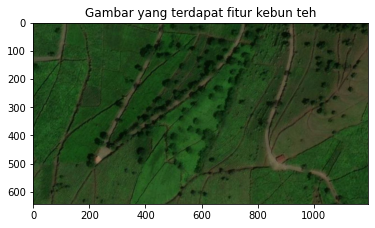

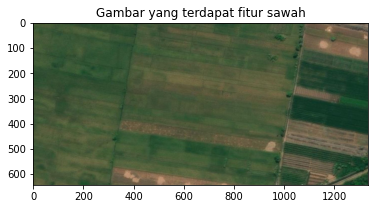

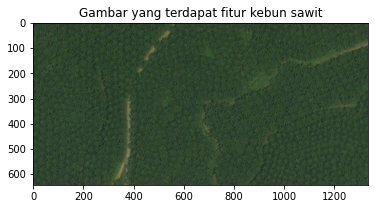

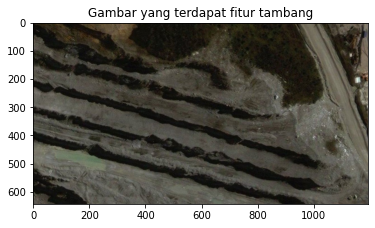

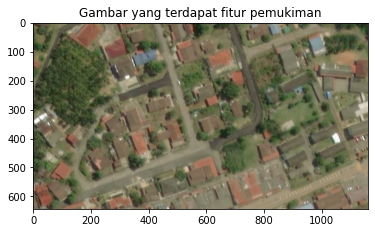

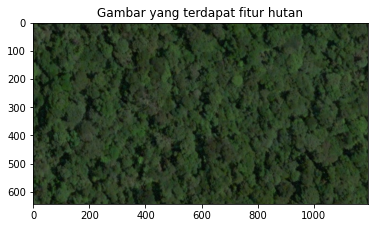

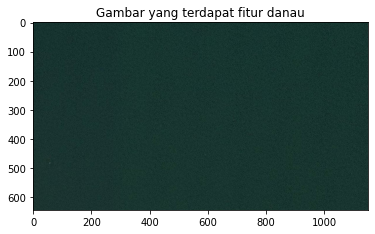

In [ ]:
#Gambar yang terdapat fitur kebun teh
plt.title("Gambar yang terdapat fitur kebun teh")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/k10.jpg"))
plt.show()

#Gambar yang terdapat fitur sawah
plt.title("Gambar yang terdapat fitur sawah")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/s3.jpg"))
plt.show()

#Gambar yang terdapat fitur kebun sawit
plt.title("Gambar yang terdapat fitur kebun sawit")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/w2.jpg"))
plt.show()

#Gambar yang terdapat fitur tambang
plt.title("Gambar yang terdapat fitur tambang")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/t7.jpg"))
plt.show()

#Gambar yang terdapat fitur pemukiman
plt.title("Gambar yang terdapat fitur pemukiman")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/p1.jpg"))
plt.show()

#Gambar yang terdapat fitur hutan
plt.title("Gambar yang terdapat fitur hutan")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/h5.jpg"))
plt.show()

#Gambar yang terdapat fitur danau
plt.title("Gambar yang terdapat fitur danau")
plt.imshow(imread("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/a7.jpg"))
plt.show()


# Membuat "patches" dari setiap gambar menggunakan metode sliding window

**Apa itu *Sliding Window* ?**

*Sliding window* adalah window yang bergeser untuk memprediksi dan mencari area objek yang benar. Suatu proses deteksi objek memerlukan teknik lokalisasi 
untuk menemukan area objek. 



In [ ]:
def save_to_folder(img_path,directory,size=56,overlap=0.4):
    #Membaca gambar path penyimpanan window ke direktori/file yang spesifik
    img = imread(img_path)
    basename = os.path.basename(img_path)
    fname = os.path.splitext(basename)[0]
    windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, size, overlap)
    for i,window in enumerate(windows):
        ii = str("{0:05d}".format(i))
        _fname = fname + "_" + ii + ".jpg"
        _img = img[window.indices()]
        if _img.shape !=(size,size,3):
            continue
        img_target_path = os.path.join(directory,_fname)
        
        imsave(img_target_path,_img, check_contrast=False)

files = os.listdir("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/")
files = [x for x in files if x.endswith(".jpg")]

#Menyimpan gambar yang telah dicacah pada folder chopped
for file in files:
    save_directory = "/content/drive/MyDrive/Colab_Notebooks/testing/"
    file = os.path.join("/content/drive/MyDrive/Colab_Notebooks/dataset/0.3/",file)
    save_to_folder(file,save_directory)

# Dataset Pelatihan

Dataset yang digunakan dalam Model Performa Klasifikasi akurasi, Recall Rate dan Presisi. Data pelatihan yang telah dichop sehingga menghasilkan gambar baru, lalu kita klasifikasikan hasilnya dengan empat kategori berupa :  *true positive* (TP), *false positive* (FP), *false negative* (FN), dan *true negative* (TN). 
Dengan ketentuan prediksi benar atau salah dan gambar sesuai dengan kelas masing-masing diberi label kelasnya

In [ ]:
#Mengembalikan daftar gambar yang telah diacak pada direktori
#Data yang dilakukan pada model evaluasi

#Mengambil citra dataset yang telah dipotong
files = os.listdir("/content/drive/MyDrive/Colab_Notebooks/testing/")
files = [x for x in files if x.endswith(".jpg")]

#Memuat dataset Pelatihan dalam bentuk array
x = []
y = []

for file in files:
    if file.startswith("s"):
        label = [1,0,0,0,0,0,0]
    elif file.startswith("w"):
        label = [0,1,0,0,0,0,0]
    elif file.startswith("k"):
        label = [0,1,0,0,0,0,0]
    elif file.startswith("h"):
        label = [0,0,1,0,0,0,0]
    elif file.startswith("t"):
        label = [0,0,0,1,0,0,0]
    elif file.startswith("p"):
        label = [0,0,0,0,1,0,0]
    elif file.startswith("a"):
        label = [0,0,0,0,0,1,0]
    else:
        label = [0,0,0,0,0,0,1]
    
    img_path = os.path.join("/content/drive/MyDrive/Colab_Notebooks/testing/",file)
    img = load_img(img_path)
    img = img_to_array(img)/255
    x.append(img)
    y.append(label)

X = np.array(x)
Y = np.array(y)
print("Bentuk array dari dataset train (pelatihan) adalah :", (X.shape,Y.shape))

Bentuk array dari dataset train (pelatihan) adalah : ((48545, 56, 56, 3), (48545, 7))


In [ ]:
np.argmax([0,0,0,0,0,1,0])

5

**Persiapan Data Pelatihan**

In [ ]:
files = os.listdir("/content/drive/MyDrive/Colab_Notebooks/testing/")
files = [x for x in files if x.endswith(".jpg")]

#Memuat dataset pengujian

X = []
Y = []

for file in files:
    if file.startswith("s"):
        label = [1,0,0,0,0,0,0]
    elif file.startswith("w"):
        label = [0,1,0,0,0,0,0]
    elif file.startswith("k"):
        label = [0,1,0,0,0,0,0]
    elif file.startswith("h"):
        label = [0,0,1,0,0,0,0]
    elif file.startswith("t"):
        label = [0,0,0,1,0,0,0]
    elif file.startswith("p"):
        label = [0,0,0,0,1,0,0]
    elif file.startswith("a"):
        label = [0,0,0,0,0,1,0]
    else:
        label = [0,0,0,0,0,0,1]

    
    img_path1 = os.path.join("/content/drive/MyDrive/Colab_Notebooks/testing/",file)
    img1 = load_img(img_path1)
    img1 = img_to_array(img1)/255.
    img1 = resize(img1,(56,56))
    X.append(img1)
    Y.append(label)

X_test = np.array(X)
Y_test = np.array(Y)
print("Bentuk array dari dataset test adalah :", (X_test.shape,Y_test.shape))

files= pd.Index(files)
print("Tampilan list gambar yang telah dichop :\n",files.value_counts())

Bentuk array dari dataset test adalah : ((48545, 56, 56, 3), (48545, 7))
Tampilan list gambar yang telah dichop :
 h2_00192.jpg     1
h7_00581.jpg     1
w1_00367.jpg     1
t10_00555.jpg    1
w3_00718.jpg     1
                ..
h10_00443.jpg    1
s5_00236.jpg     1
t10_00487.jpg    1
w3_00002.jpg     1
w7_00722.jpg     1
Length: 48545, dtype: int64


In [ ]:
np.save("X_test.npy",X_test)
np.save("Y_test.npy",Y_test)

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X_test,Y_test,test_size=0.15,stratify = Y )

print("Bentuk array dari dataset train (pelatihan) adalah:",train_x.shape,train_x.shape)
print("Bentuk array dari dataset validation adalah:",valid_x.shape,valid_x.shape)
#print("Bentuk array dari dataset test (pengujian) adalah:",x_test.shape,y_test.shape)

Bentuk array dari dataset train (pelatihan) adalah: (41263, 56, 56, 3) (41263, 56, 56, 3)
Bentuk array dari dataset validation adalah: (7282, 56, 56, 3) (7282, 56, 56, 3)


In [ ]:
print(np.unique(train_y))

[0 1]


In [ ]:
#Mengkomputasi kelas bobotnya
print(np.unique(train_y,return_counts=True))
print(np.unique(valid_y,return_counts=True))

cw = compute_class_weight("balanced",np.unique(train_y),train_y)
print(cw)

(array([0, 1]), array([247578,  41263]))
(array([0, 1]), array([43692,  7282]))


TypeError: ignored

#Pembuatan Model

In [ ]:
import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd


In [ ]:
IMG_SHAPE = (56, 56, 3)
# Membuat model dasar (base model) dari pre-trained model MobileNet
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = True
base_model.summary()

NameError: ignored

In [ ]:
model = tf.keras.Sequential([
    base_model,  
    #tf.keras.layers.Conv2D(16,(3,3),name="conv1",input_shape=(56,56,3),activation="relu",padding="same"),   
    #tf.keras.layers.MaxPool2D((2,2),name="pool1"),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Conv2D(32,(3,3),name="conv2",padding="same"),
    #tf.keras.layers.Activation("relu"),
    #tf.keras.layers.MaxPool2D((2,2),name="pool2"),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Conv2D(32,(3,3),name="conv3",padding="same"),10
    #tf.keras.layers.Activation("relu"),
    #tf.keras.layers.MaxPool2D((2,2),name="pool3"),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(7,activation = tf.keras.activations.softmax)]
    )

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total params: 14,731,335
Trainable params: 14,731,335
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Menyimpan model bobot yang terbaik selama training
ckpt = ModelCheckpoint("/content/drive/MyDrive/Colab_Notebooks/earth.h5/", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history= model.fit(train_x,
                    train_y,
                    batch_size=500,
                    epochs = 50,
                    validation_data=(valid_x,valid_y),
                    callbacks = [ckpt]
                    )

NameError: ignored

#Menggambarkan Hasil Pelatihan

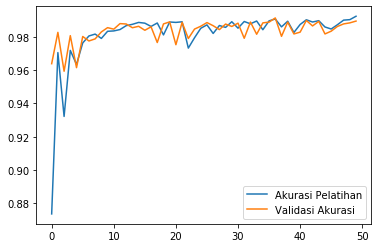

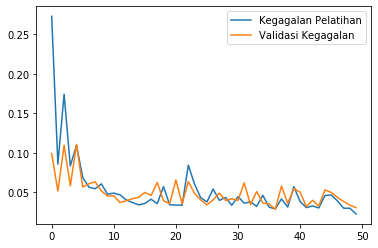

In [ ]:
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kegagalan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kegagalan")
plt.legend()
plt.show()

# Evaluasi dengan model


In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data training
print(model.evaluate(train_x,train_y))
#Evaluasi validasi data
print(model.evaluate(valid_x,valid_y))
#Evaluasi test data
print('[Loss, Acc] Test Penelitian', model.evaluate(x= X_test, y = Y_test))

['loss', 'acc']
66825/66825 [==============================] - 22s 332us/sample - loss: 0.0167 - acc: 0.9951
[0.016716347419190977, 0.99513656]
22275/22275 [==============================] - 7s 329us/sample - loss: 0.0309 - acc: 0.9894
[0.030851513446532357, 0.98940516]
20/20 [==============================] - 0s 445us/sample - loss: 0.1747 - acc: 0.9500
[Loss, Acc] Test Pulau Jawa [0.17473874986171722, 0.95]
20/20 [==============================] - 0s 439us/sample - loss: 0.2945 - acc: 0.8500
[Loss, Acc] Test Pulau Kalimantan [0.29453423619270325, 0.85]
20/20 [==============================] - 0s 456us/sample - loss: 0.0327 - acc: 1.0000
[Loss, Acc] Test Pulau Sumatra [0.032668642699718475, 1.0]


In [ ]:
y_pred_class = model.predict_classes(X_test)

In [ ]:
#Jumlah data prediksi dari data test
print('Jumlah data prediksi hasil dari dataset pengujian pada Pulau Jawa :', y_pred_class1.transpose())
print('Jumlah data prediksi hasil dari dataset pengujian pada Pulau Kalimantan :', y_pred_class2.transpose())
print('Jumlah data prediksi hasil dari dataset pengujian pada Pulau Sumatra :', y_pred_class3.transpose())

Jumlah data prediksi hasil dari dataset pengujian pada Pulau Jawa : [[0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0]]
Jumlah data prediksi hasil dari dataset pengujian pada Pulau Kalimantan : [[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]]
Jumlah data prediksi hasil dari dataset pengujian pada Pulau Sumatra : [[0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1]]


In [ ]:
from sklearn import metrics
print("Akurasi pada data Pulau Jawa:",metrics.accuracy_score(y_test1, y_pred_class1))
print("Akurasi pada data Pulau Kalimantan:",metrics.accuracy_score(y_test2, y_pred_class2))
print("Akurasi pada data Pulau Sumatra:",metrics.accuracy_score(y_test3, y_pred_class3))

Akurasi pada data Pulau Jawa: 0.95
Akurasi pada data Pulau Kalimantan: 0.85
Akurasi pada data Pulau Sumatra: 1.0


In [ ]:
# Mengetahui class berdasarkan gambar sawah dan bukan sawah 
# Apabila 1 menandakan gambar sawah dan 0 bukan sawah 

Y_test1 = pd.Index(y_test1)
print("Class dan jumlah data Pulau Jawa:\n Class Jumlah \n",Y_test1.value_counts())
print("\n")
Y_test2 = pd.Index(y_test2)
print("Class dan jumlah data Pulau Kalimantan:\n Class Jumlah \n",Y_test2.value_counts())
print("\n")
Y_test3 = pd.Index(y_test3)
print("Class dan jumlah data Pulau Sumatra:\n Class Jumlah \n",Y_test3.value_counts())
print("\n")

Class dan jumlah data Pulau Jawa:
 Class Jumlah 
 1    10
0    10
dtype: int64


Class dan jumlah data Pulau Kalimantan:
 Class Jumlah 
 1    10
0    10
dtype: int64


Class dan jumlah data Pulau Sumatra:
 Class Jumlah 
 1    10
0    10
dtype: int64




In [ ]:
# Menampilkan 25 data pertama/awal true atau pun prediksi 
print("Dataset Pulau Jawa:")
print('True:', Y_test1.values[0:20])
print('False:', y_pred_class1.transpose()[0:20])
print("\n")
print("Dataset Pulau Kalimantan:")
print('True:', Y_test2.values[0:20])
print('False:', y_pred_class2.transpose()[0:20])
print("\n")
print("Dataset Pulau Sumatra:")
print('True:', Y_test3.values[0:20])
print('False:', y_pred_class3.transpose()[0:20])

Dataset Pulau Jawa:
True: [0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0]
False: [[0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0]]


Dataset Pulau Kalimantan:
True: [0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1]
False: [[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]]


Dataset Pulau Sumatra:
True: [0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1]
False: [[0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1]]


In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test1, y_pred_class1)
print("Matriks hasil clasification Pulau Jawa:\n",confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
# save confusion matrix and slice into four pieces
confusion1 = metrics.confusion_matrix(Y_test2, y_pred_class2)
print("Matriks hasil clasification Pulau Kalimantan:\n",confusion1)
#[row, column]
TP1 = confusion1[1, 1]
TN1 = confusion1[0, 0]
FP1 = confusion1[0, 1]
FN1 = confusion1[1, 0]

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
# save confusion matrix and slice into four pieces
confusion2 = metrics.confusion_matrix(Y_test3, y_pred_class3)
print("Matriks hasil clasification Pulau Sumatra:\n",confusion2)
#[row, column]
TP2 = confusion2[1, 1]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]

Matriks hasil clasification Pulau Jawa:
 [[10  0]
 [ 1  9]]
Matriks hasil clasification Pulau Kalimantan:
 [[10  0]
 [ 3  7]]
Matriks hasil clasification Pulau Sumatra:
 [[10  0]
 [ 0 10]]


Classification accuracy Pulau Jawa: 0.95
Classification accuracy Pulau Kalimantan: 0.85
Classification accuracy Pulau Sumatra: 1.0


Text(0, 0.5, 'Accuracy')

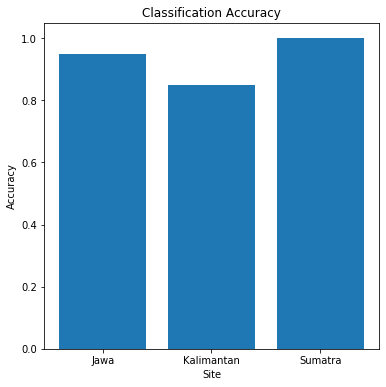

In [ ]:
# Classification accuracy dari ketiga pulau 
#print((TP + TN) / float(TP + TN + FP + FN))
print("Classification accuracy Pulau Jawa:",metrics.accuracy_score(Y_test1, y_pred_class1))

#print((TP1 + TN1) / float(TP1 + TN1 + FP1 + FN1))
print("Classification accuracy Pulau Kalimantan:",metrics.accuracy_score(Y_test2, y_pred_class2))

#print((TP2 + TN2) / float(TP2 + TN2 + FP2 + FN2))
print("Classification accuracy Pulau Sumatra:",metrics.accuracy_score(Y_test3, y_pred_class3))

import matplotlib.pyplot as plt

data = {'Jawa': metrics.accuracy_score(Y_test1, y_pred_class1), 'Kalimantan': metrics.accuracy_score(Y_test2, y_pred_class2), 'Sumatra': metrics.accuracy_score(Y_test3, y_pred_class3)}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
axs.bar(names, values)

plt.title('Classification Accuracy')
plt.xlabel('Site')
plt.ylabel('Accuracy')

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
#print(classification_error)
#print(1 - metrics.accuracy_score(test_y, y_pred_class))
print("Classification error Pulau Jawa:",1 - metrics.accuracy_score(Y_test1, y_pred_class1))

classification_error1 = (FP1 + FN1) / float(TP1 + TN1 + FP1 + FN1)
#print(classification_error1)
print("Classification error Pulau Kalimantan:",1 - metrics.accuracy_score(Y_test2, y_pred_class2))

classification_error = (FP2 + FN2) / float(TP2 + TN2 + FP2 + FN2)
#print(classification_error)
print("Classification error Pulau Sumatra:",1 - metrics.accuracy_score(Y_test3, y_pred_class3))

Classification error Pulau Jawa: 0.050000000000000044
Classification error Pulau Kalimantan: 0.15000000000000002
Classification error Pulau Sumatra: 0.0


Recall Rate Sawah Pulau Jawa: 0.9
Recall Rate Sawah Pulau Kalimantan: 0.7
Recall Rate Sawah Pulau Sumatra: 1.0


Text(0.5, 0, 'Site')

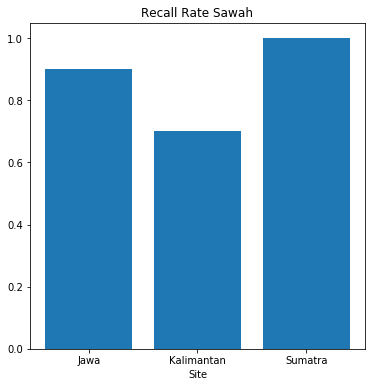

In [ ]:
recall_rate_sawah = TP / float(FN + TP)

print("Recall Rate Sawah Pulau Jawa:",recall_rate_sawah)
#print(metrics.recall_score(test_y, y_pred_class))

recall_rate_sawah1 = TP1 / float(FN1 + TP1)

print("Recall Rate Sawah Pulau Kalimantan:",recall_rate_sawah1)
#print(metrics.recall_score(test_y1, y_pred_class1))

recall_rate_sawah2 = TP2 / float(FN2 + TP2)

print("Recall Rate Sawah Pulau Sumatra:",recall_rate_sawah2)
#print(metrics.recall_score(test_y2, y_pred_class2))

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': recall_rate_sawah, 'Kalimantan': recall_rate_sawah1, 'Sumatra': recall_rate_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('Recall Rate Sawah')
plt.xlabel('Site')

Recall Rate Bukan Sawah Pulau Jawa: 1.0
Recall Rate Bukan Sawah Pulau Kalimantan: 1.0
Recall Rate Bukan Sawah Pulau Sumatra: 1.0


Text(0, 0.5, 'Recall Rate')

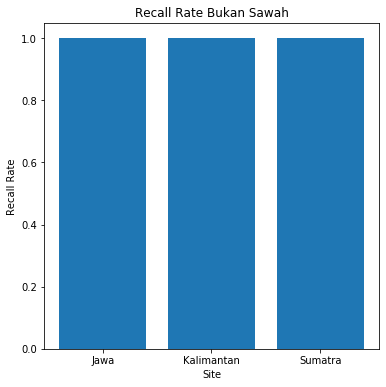

In [ ]:
recall_rate_bukan_sawah = TN / (TN + FP)
print("Recall Rate Bukan Sawah Pulau Jawa:",recall_rate_bukan_sawah)

recall_rate_bukan_sawah1 = TN1 / (TN1 + FP1)
print("Recall Rate Bukan Sawah Pulau Kalimantan:",recall_rate_bukan_sawah1)

recall_rate_bukan_sawah2 = TN2 / (TN2 + FP2)
print("Recall Rate Bukan Sawah Pulau Sumatra:",recall_rate_bukan_sawah2)

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': recall_rate_bukan_sawah, 'Kalimantan': recall_rate_bukan_sawah1, 'Sumatra': recall_rate_bukan_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('Recall Rate Bukan Sawah')
plt.xlabel('Site')
plt.ylabel('Recall Rate')

In [ ]:
false_positive_rate = FP / float(TN + FP)
#print(false_positive_rate)
print("false positive rate Pulau Jawa:",1 - recall_rate_bukan_sawah)

false_positive_rate1 = FP1 / float(TN1 + FP1)
#print(false_positive_rate1)
print("false positive rate Pulau Kalimantan:",1 - recall_rate_bukan_sawah1)

false_positive_rate2 = FP2 / float(TN2 + FP2)
#print(false_positive_rate2)
print("false positive rate Pulau Sumatra:",1 - recall_rate_bukan_sawah2)

false positive rate Pulau Jawa: 0.0
false positive rate Pulau Kalimantan: 0.0
false positive rate Pulau Sumatra: 0.0


Precision Sawah Pulau Jawa: 1.0
Precision Sawah Pulau Kalimantan: 1.0
Precision Sawah Pulau Sumatra: 1.0


Text(0, 0.5, 'Precision')

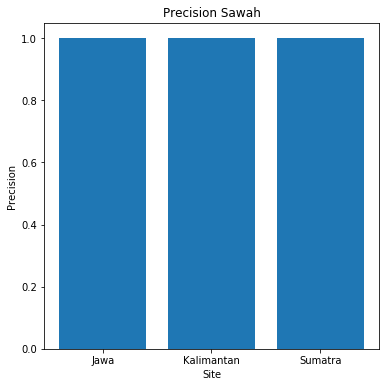

In [ ]:
precision_sawah = TP / float(TP + FP)
print("Precision Sawah Pulau Jawa:",precision_sawah)

precision_sawah1 = TP1 / float(TP1 + FP1)
print("Precision Sawah Pulau Kalimantan:",precision_sawah1)

precision_sawah2 = TP2 / float(TP2 + FP2)
print("Precision Sawah Pulau Sumatra:",precision_sawah2)

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': precision_sawah, 'Kalimantan': precision_sawah1, 'Sumatra': precision_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('Precision Sawah')
plt.xlabel('Site')
plt.ylabel('Precision')

Precision Bukan Sawah Pulau Jawa: 1.0
Precision Bukan Sawah Pulau Kalimantan: 1.0
Precision Bukan Sawah Pulau Sumatra: 1.0


Text(0, 0.5, 'Precision')

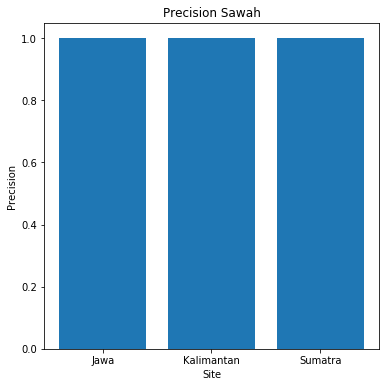

In [ ]:
precision_bukan_sawah = TN / float (FP + TN)
print("Precision Bukan Sawah Pulau Jawa:",precision_bukan_sawah)

precision_bukan_sawah1 = TN1 / float(FP1 + TN1)
print("Precision Bukan Sawah Pulau Kalimantan:",precision_bukan_sawah1)

precision_bukan_sawah2 = TN2 / float(FP2 + TN2)
print("Precision Bukan Sawah Pulau Sumatra:",precision_bukan_sawah2)

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': precision_bukan_sawah, 'Kalimantan': precision_bukan_sawah1, 'Sumatra': precision_bukan_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('Precision Sawah')
plt.xlabel('Site')
plt.ylabel('Precision')

F1 Sawah Pulau Jawa: 0.9473684210526316
F1 Sawah Pulau Kalimantan: 0.8235294117647058
F1 Sawah Pulau Sumatra: 1.0


Text(0, 0.5, 'F1')

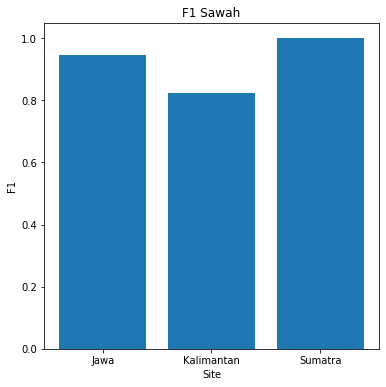

In [ ]:
F1_sawah = (2*(precision_sawah*recall_rate_sawah)/(precision_sawah + recall_rate_sawah))
print("F1 Sawah Pulau Jawa:",F1_sawah)

F1_sawah1 = (2*(precision_sawah1*recall_rate_sawah1)/(precision_sawah1 + recall_rate_sawah1))
print("F1 Sawah Pulau Kalimantan:",F1_sawah1)

F1_sawah2 = (2*(precision_sawah2*recall_rate_sawah2)/(precision_sawah2 + recall_rate_sawah2))
print("F1 Sawah Pulau Sumatra:",F1_sawah2)

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': F1_sawah, 'Kalimantan': F1_sawah1, 'Sumatra': F1_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('F1 Sawah')
plt.xlabel('Site')
plt.ylabel('F1')

F1 Bukan Sawah Pulau Jawa: 1.0
F1 Bukan Sawah Pulau Kalimantan: 1.0
F1 Bukan Sawah Pulau Sumatra: 1.0


Text(0, 0.5, 'F1')

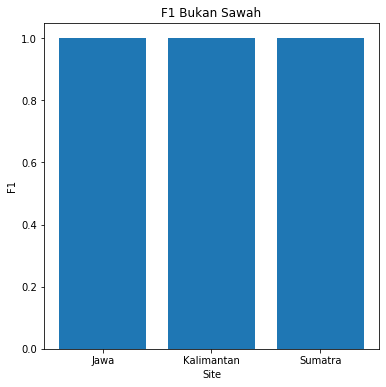

In [ ]:
F1_bukan_sawah = (2*(precision_bukan_sawah*recall_rate_bukan_sawah)/(precision_bukan_sawah + recall_rate_bukan_sawah))
print("F1 Bukan Sawah Pulau Jawa:",F1_bukan_sawah)

F1_bukan_sawah1 = (2*(precision_bukan_sawah1*recall_rate_bukan_sawah1)/(precision_bukan_sawah1 + recall_rate_bukan_sawah1))
print("F1 Bukan Sawah Pulau Kalimantan:",F1_bukan_sawah1)

F1_bukan_sawah2 = (2*(precision_bukan_sawah2*recall_rate_bukan_sawah2)/(precision_bukan_sawah2 + recall_rate_bukan_sawah2))
print("F1 Bukan Sawah Pulau Sumatra:",F1_bukan_sawah2)

import matplotlib.pyplot as plt
import decimal

data = {'Jawa': F1_bukan_sawah, 'Kalimantan': F1_bukan_sawah1, 'Sumatra': F1_bukan_sawah2}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.bar(names, values)

plt.title('F1 Bukan Sawah')
plt.xlabel('Site')
plt.ylabel('F1')

# Evaluasi Gambar Pelatihan dengan Gambar Data Pengujian

# Mengetahui Akurasi Gambar Data Pengujian dalam Piksel

Pada evaluasi gambar ini, kita mencari akurasi data pengujian dalam piksel. Terdapat 2 jenis gambar yang akan diujikan dalam mendapatkan nilai akurasi piksel, yaitu gambar dengan sawah dan gambar bukan/atau selain sawah.

**Akurasi Gambar Pengujian dengan Sawah**

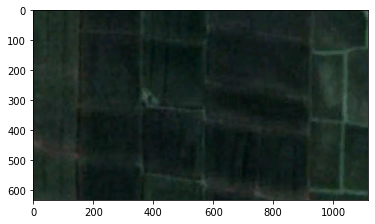

27
1296 27 48


In [ ]:

#Membaca Gambar Test Data dan Menampilkannya
img_path = "data/paddy/test/Jawa/b151.jpg"
img = load_img(img_path)
img = img_to_array(img)/255
plt.imshow(img)
plt.show()

#Membuat subimages dengan patches menggunkan metode sliding windows
patches = []
windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, 56, 0.6)
for i,window in enumerate(windows):
    _img = img[window.indices()]
    patches.append(_img)
patches = np.array(patches)

#Mengecek total gambar dan banyaknya gambar yang terpasang pada height direction, maupun width direction
n_total = len(windows)
_x = 0
for i,window in enumerate(windows):
    if _x != window.x:
        n_x = i
        print(n_x)
        break
    _x = window.x


print(n_total,n_x,n_total//n_x)

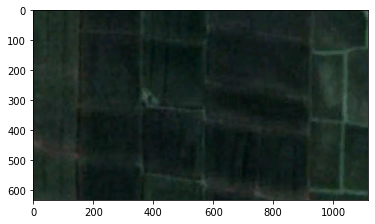

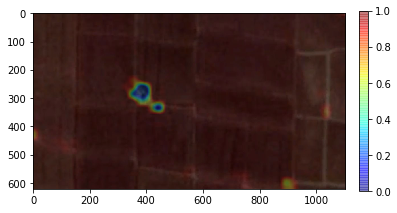

In [ ]:
#Memprediksi probalititas keberadaaan lahan sawah padi terhadap gambar yang telah dicacah 
#dan kembali pada gambar original
predictions = model.predict(patches)
#print(predictions.shape)
#print(predictions)
paddy = np.reshape(predictions,(n_total//n_x,n_x))
paddy = np.rot90(paddy)
paddy = np.flip(paddy,axis=0)
#Array pada gambar diperbesar menggunakan interpolasi spline
h_factor = img.shape[0]//paddy.shape[0]
w_factor = img.shape[1]//paddy.shape[1]
#print(h_factor)

from scipy.ndimage import zoom
zoomed = zoom(paddy,(h_factor,w_factor))
#print(zoomed.shape)

#Menampilkan hasil gambar level tertentu
plt.imshow(img)
plt.show()

plt.imshow(img)
plt.imshow(zoomed,alpha=0.3,vmax=1.0,vmin=0,cmap="jet")

plt.colorbar(fraction=0.027, pad=0.04,alpha=0)
plt.show()

In [ ]:
#Memperoleh Nilai Akurasi data pengujian dalam piksel
print("Minimal level zoomed :", np.min(zoomed))
print("Maximal level zoomed :", np.max(zoomed))
#Menampilkan nilai level zoomed dalam range 0 sampai 1
normalized = (zoomed-np.min(zoomed))/(np.max(zoomed)-np.min(zoomed))
print("Minimal level ternomalisasi:", np.min(normalized))
print("Maximal level ternomalisasi:", np.max(normalized))
print('')
#Menghitung banyaknya piksel
#Tingkatan level warna dari 0 sampai 1 yang mencapai bentuk sawah adalah 0.5 (Nilai diantara 0 dan 1)
banyakpiksel=(normalized>0.5).sum()
akurasi=((normalized>0.5).sum()*100/(normalized<1).sum())
print("Banyaknya piksel yang terlihat sawah :", (banyakpiksel))
print("Akurasi dalam piksel (100%) :", (akurasi))

Minimal level zoomed : -0.24741526
Maximal level zoomed : 1.1187245
Minimal level ternomalisasi: 0.0
Maximal level ternomalisasi: 1.0

Banyaknya piksel yang terlihat sawah : 680403
Akurasi dalam piksel (100%) : 99.24443867482128


**Akurasi Gambar Pengujian dengan Bukan/Atau Selain Sawah**

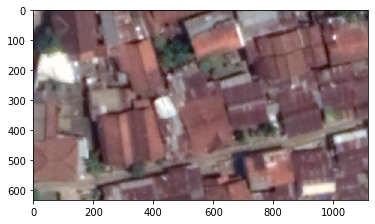

27
1296 27 48


In [ ]:
#Membaca Gambar Test Data dan Menampilkannya
img_path11 = "data/paddy/test/Jawa/o153.jpg"
img11 = load_img(img_path11)
img11 = img_to_array(img11)/255
plt.imshow(img11)
plt.show()

#Membuat subimages dengan patches menggunkan metode sliding windows
patches11 = []
windows11 = sw.generate(img11, sw.DimOrder.HeightWidthChannel, 56, 0.6)
for i,window in enumerate(windows11):
    _img11 = img11[window.indices()]
    patches11.append(_img11)
patches11 = np.array(patches11)

#Mengecek total gambar dan banyaknya gambar yang terpasang pada height direction, maupun width direction
n_total11 = len(windows11)
_x11 = 0
for i,window in enumerate(windows11):
    if _x != window.x:
        n_x11 = i
        print(n_x11)
        break
    _x = window.x


print(n_total11,n_x11,n_total11//n_x11)

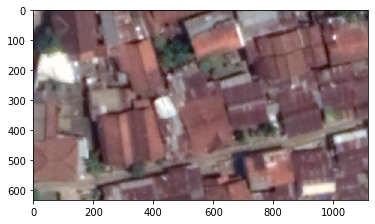

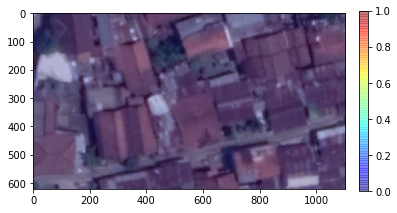

In [ ]:
#Memprediksi probalititas keberadaaan lahan sawah padi terhadap gambar yang telah dicacah 
#dan kembali pada gambar original
predictions11 = model.predict(patches11)
#print(predictions.shape)
#print(predictions)
paddy11 = np.reshape(predictions11,(n_total11//n_x11,n_x11))
paddy11 = np.rot90(paddy11)
paddy11 = np.flip(paddy11,axis=0)
#Array pada gambar diperbesar menggunakan interpolasi spline
h_factor11 = img11.shape[0]//paddy11.shape[0]
w_factor11 = img11.shape[1]//paddy11.shape[1]
#print(h_factor)

from scipy.ndimage import zoom
zoomed11 = zoom(paddy11,(h_factor11,w_factor11))
#print(zoomed.shape)

#Menampilkan hasil gambar level tertentu
plt.imshow(img11)
plt.show()

plt.imshow(img11)
plt.imshow(zoomed11,alpha=0.3,vmax=1.0,vmin=0,cmap="jet")

plt.colorbar(fraction=0.027, pad=0.04,alpha=0)
plt.show()

In [ ]:
#Memperoleh Nilai Akurasi data pengujian dalam piksel
print("Minimal level zoomed :", np.min(zoomed11))
print("Maximal level zoomed :", np.max(zoomed11))
#Menampilkan nilai level zoomed dalam range 0 sampai 1
normalized11 = (zoomed11-np.min(zoomed11))/(np.max(zoomed11)-np.min(zoomed11))
print("Minimal level ternomalisasi:", np.min(normalized11))
print("Maximal level ternomalisasi:", np.max(normalized11))
print('')
#Menghitung banyaknya piksel
#Tingkatan level warna dari 0 sampai 1 yang mencapai bentuk sawah adalah 0.5 (Nilai diantara 0 dan 1)
banyakpiksel11=(normalized11<0.5).sum()
akurasi11=((normalized11<0.5).sum()*100/(normalized11<1).sum())
print("Banyaknya piksel yang terlihat bukan sawah :", (banyakpiksel11))
print("Akurasi dalam piksel (100%) :", (akurasi11))

Minimal level zoomed : -0.002602359
Maximal level zoomed : 0.013650833
Minimal level ternomalisasi: 0.0
Maximal level ternomalisasi: 1.0

Banyaknya piksel yang terlihat bukan sawah : 683102
Akurasi dalam piksel (100%) : 99.63811821471653


# Evaluasi Data Pelatihan terhadap Pengujian dalam Luas Lahan

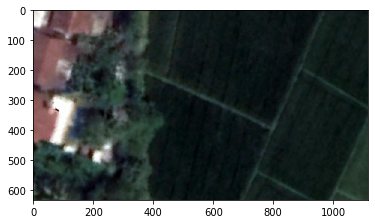

27
1296 27 48


In [ ]:
#Membaca Gambar Test Data dan Menampilkannya
img_path22 = "data/paddy/test/test_image/test_image1.jpg"
img22 = load_img(img_path22)
img22 = img_to_array(img22)/255
plt.imshow(img22)
plt.show()

#Membuat subimages dengan patches menggunkan metode sliding windows
patches22 = []
windows22 = sw.generate(img22, sw.DimOrder.HeightWidthChannel, 56, 0.6)
for i,window in enumerate(windows22):
    _img22 = img22[window.indices()]
    patches22.append(_img22)
patches22 = np.array(patches22)

#Mengecek total gambar dan banyaknya gambar yang terpasang pada height direction, maupun width direction
n_total22 = len(windows22)
_x = 0
for i,window in enumerate(windows22):
    if _x != window.x:
        n_x22 = i
        print(n_x22)
        break
    _x = window.x


print(n_total22,n_x22,n_total22//n_x22)

In [ ]:
print(patches.shape)

(1296, 56, 56, 3)


#Prediksi Gambar Individual

(1296, 1)
[[0.0000000e+00]
 [0.0000000e+00]
 [1.4603138e-06]
 ...
 [9.9995852e-01]
 [9.9638128e-01]
 [9.9592113e-01]]


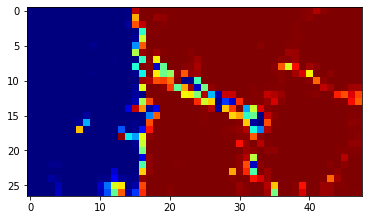

In [ ]:
#Memprediksi probalititas keberadaaan lahan sawah padi terhadap gambar yang telah dicacah 
#dan kembali pada gambar original
predictions22 = model.predict(patches22)
print(predictions22.shape)
print(predictions22)

paddy22 = np.reshape(predictions22,(n_total22//n_x22,n_x22))
paddy22 = np.rot90(paddy22)
paddy22 = np.flip(paddy22,axis=0)
plt.imshow(paddy22,cmap="jet")

**Catatan** :
Bahwa setiap gambar sesuai dengan 1 piksel dari probabilitasnya, dan ukurannya tidak kompatibel dengan gambar input.
Oleh karena itu peneliti akan menghitung faktor rasio dan mengubah ukurannya

In [ ]:
#Array pada gambar diperbesar menggunakan interpolasi spline
h_factor22 = img22.shape[0]//paddy22.shape[0]
w_factor22 = img22.shape[1]//paddy22.shape[1]
print(h_factor22)

from scipy.ndimage import zoom
zoomed22 = zoom(paddy22,(h_factor22,w_factor22))

print(zoomed22.shape)

23
(621, 1104)


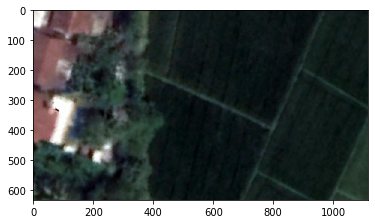

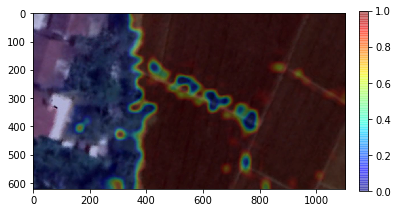

In [ ]:
#Menampilkan hasil gambar level tertentu
plt.imshow(img22)
plt.show()

plt.imshow(img22)
plt.imshow(zoomed22,alpha=0.3,vmax=1.0,vmin=0,cmap="jet")

plt.colorbar(fraction=0.027, pad=0.04,alpha=0)
plt.show()

#Menampilkan Luas Lahan Sawah yang berwarna Merah


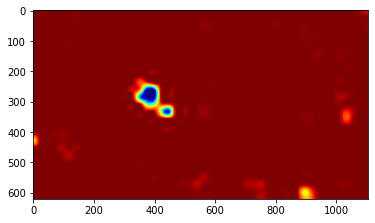

In [ ]:
plt.imshow(zoomed,alpha=1,vmax=1.0,vmin=0,cmap="jet")

#Menghitung luas Sawah 


In [ ]:
#Menampilkan nilai level zoomed dalam range acak
print("Minimal level zoomed :", np.min(zoomed22))
print("Maximal level zoomed :", np.max(zoomed22))

Minimal level zoomed : -0.15725686
Maximal level zoomed : 1.1433744


In [ ]:
#Menampilkan nilai level zoomed dalam range 0 sampai 1
normalized22 = (zoomed22-np.min(zoomed22))/(np.max(zoomed22)-np.min(zoomed22))
print("Minimal level ternomalisasi:", np.min(normalized22))
print("Maximal level ternomalisasi:", np.max(normalized22))

Minimal level ternomalisasi: 0.0
Maximal level ternomalisasi: 1.0


In [ ]:
#Menghitung luas lahan sawah dalam piksel
#Tingkatan level warna dari 0 sampai 1 yang mencapai bentuk sawah adalah 0.5 (Nilai diantara 0 dan 1)
luaspiksel22=(normalized22>0.5).sum()
akurasi22=((normalized22>0.5).sum()*100/(normalized22<1).sum())
print("Luas lahan sawah dalam piksel :", (luaspiksel22))
print("Persentase lahan sawah dalam piksel (100%) :", (akurasi22))

Luas lahan sawah dalam piksel : 442656
Persentase lahan sawah dalam piksel (100%) : 64.56636176801351


"Validitas Pengukuran di Lapangan"

![image](https://raw.githubusercontent.com/Gio1709/paddy_100m/master/Validitas%20Pengukuran.jpg)

Untuk validasi/keakuratan perhitungan konversi nilai piksel pada meter, saya memiliki pengukuran secara langsung di lapangan. Objek yang digunakan sebagai pengukuran tersebut dilakukan pada **lebar jalan di depan rumah**. **Lokasi terletak di Dusun II RT 02/RW 07, Sokaraja Tengah, Kecamatan Sokaraja, Kabupaten Banyumas, Provinsi Jawa Tengah.**

Dengan menggunakan **alat ukur meteran**, diperoleh lebar jalan sebesar **2,71 meter.** Dapat dilihat lebih detail pada gambar.




**"Validasi Nilai Piksel ke dalam Meter"**

![image](https://raw.githubusercontent.com/Gio1709/paddy_100m/master/New%20Gambar%20100m.jpg)

Dapat dilakukan dengan langkah-langkah sbb :
1.   Menzoom/memperbesar sampel gambar (sampai batas maksimum).
2.   Menghitung jumlah piksel, sebagai contoh pada objek lebar jalan. Dimana didapatkan lebarnya sebesar 2,71 meter melalui fitur pengukuran pada Google Earth. Begitu pula dengan validitas pengukuran di lapangan pada lokasi yang sama diperoleh lebar sebesar 2,71 meter.[Resolusi Gambar adalah 1116x632 piksel]
3.   Pada ketinggian 100 meter, dapat dikalkulasi nilai lebar jalan dalam piksel, disini berjumlah 40 piksel. Lalu dilakukan perhitungan sebagai berikut :
    *   Nilai Meter/Piksel(**M/P**) = **M**(meter) / **P**(piksel)
                           = 2,71 meter / 40 piksel
                           = 0,06775 m/p 
                           ~= 0,068 m/p

Maka konversi 1 piksel menjadi meter pada gambar ini sebesar 0,068

Untuk menghitung luas maka dilakukan dengan 0,068 x 0,068 = 0,004624 (m/p)^2

In [ ]:
#Setelah diketahui luas sawah dalam piksel, kemudian menkonversi dalam meter dan hektar
#Untuk menghitung luas maka dilakukan dengan 0,3 x 0,3 = 0,09 
luasmtr = 0.004624*(luaspiksel22)
luasha = (luasmtr)/10000
print("Luas lahan sawah dalam meter persegi :", (luasmtr))
print("Luas lahan sawah dalam hektar :", (luasha))

Luas lahan sawah dalam meter persegi : 2046.841344
Luas lahan sawah dalam hektar : 0.2046841344


# Perbandingan Hasil Luas Lahan dengan Fitur pada Google Earth

![image](https://raw.githubusercontent.com/Gio1709/paddy_100m/master/Perbandingan%20Google.jpg)

Hasil yang diperoleh pada fitur pengukuran luas lahan dalam hektar pada Google Earth didapatkan hasil sebesar 0,20 Hektar. Akan tetapi perlu diperhatikan dataset pengujian/testing yang digunakan dalam pengukuran lahan sawah mesti pada ketinggian yang sama dengan dataset pelatihan/training. 

Pada bagian ini diketahui ketinggiannya adalah 100 meter.